# Cluster Switching

This file reads the output from read_overlap.ipynb and makes sure that clusters do not flip as the window moves.

In [ ]:
# Import modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../run1-chr17-20210614.txt', header=None)

In [4]:
df.head()

,0,1
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0


# Get reads with unique cluster

In [24]:
df.columns=['read','tag']

In [25]:
df['mean'] = df.groupby('read').transform('mean')

In [26]:
df.head()

,read,tag,mean
0,0,0,0.0
1,1,1,1.0
2,0,0,0.0
3,1,1,1.0
4,0,0,0.0


In [28]:
df.loc[df['mean']==0].groupby('read').first()

,tag,mean
read,,
0,0,0.0
3,0,0.0
7,0,0.0
8,0,0.0
19,0,0.0
...,...,...
2375,0,0.0
2379,0,0.0
2389,0,0.0


In [29]:
df.loc[df['mean']==1].groupby('read').first()

,tag,mean
read,,
1,1,1.0
5,1,1.0
12,1,1.0
613,1,1.0
759,1,1.0
...,...,...
2358,1,1.0
2371,1,1.0
2381,1,1.0


In [49]:
df['final']=df['mean'].round(decimals=0)

In [50]:
# df['final']=np.floor(df['mean'])

In [51]:
df.describe()

,read,tag,mean,final
count,15622.000000,15622.000000,15622.000000,15622.000000
mean,1139.749200,0.341314,0.341314,0.283959
std,690.579067,0.474166,0.256956,0.450931
min,0.000000,0.000000,0.000000,0.000000
25%,535.250000,0.000000,0.200000,0.000000
50%,1103.000000,0.000000,0.333333,0.000000
75%,1717.750000,1.000000,0.541667,1.000000
max,2402.000000,1.000000,1.000000,1.000000


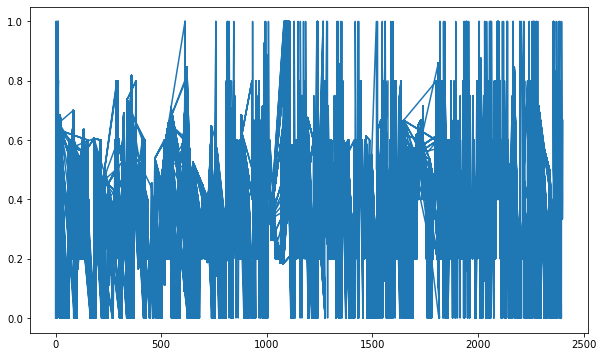

In [56]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(df['read'],df['mean'])

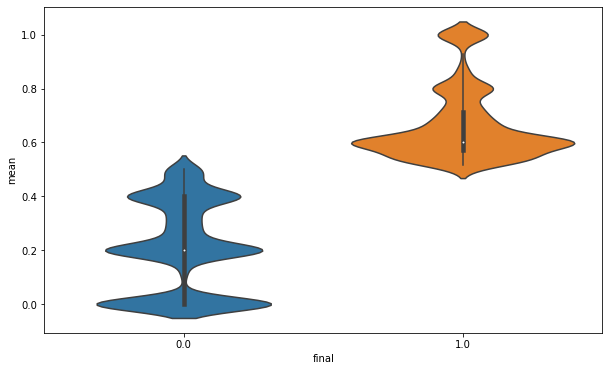

In [55]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.violinplot(x='final', y='mean', data=df)

In [39]:
df['read'].nunique()

2306

In [15]:
read_list = df['read'].unique()

In [17]:
clean_reads = []
for i in read_list:
#     print(i)
    print(df.loc[df['read']==i,'tag'].mean())

0.0
1.0
0.0
0.3888888888888889
1.0
0.6216216216216216
0.0
0.0
0.32
0.4074074074074074
0.4
1.0
0.8
0.2
0.6578947368421053
0.2
0.6578947368421053
0.2
0.0
0.0
0.0
0.6842105263157895
0.0
0.0
0.631578947368421
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5625
0.0
0.375
0.0
0.5625
0.0
0.2
0.6
0.2857142857142857
0.2
0.2
0.2
0.2
0.2
0.2
0.45454545454545453
0.2
0.2
0.5416666666666666
0.2
0.2
0.2
0.2
0.2
0.2
0.7
0.6176470588235294
0.0
0.0
0.0
0.0
0.5333333333333333
0.5789473684210527
0.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.3333333333333333
0.3333333333333333
0.2
0.16666666666666666
0.2
0.16666666666666666
0.2
0.2
0.5
0.5454545454545454
0.2
0.5
0.45454545454545453
0.2
0.42857142857142855
0.5
0.2857142857142857
0.2
0.2857142857142857
0.5
0.2
0.5
0.2
0.5833333333333334
0.3333333333333333
0.2
0.2857142857142857
0.2857142857142857
0.2
0.2
0.2857142857142857
0.6363636363636364
0.25
0.2857142857142857
0.555555555

In [10]:
df.head()

,0,1
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0


In [9]:
df.iloc[:,0]

0           0
1           1
2           0
3           1
4           0
         ... 
15617    2402
15618    2401
15619    2402
15620    2401
15621    2402
Name: 0, Length: 15622, dtype: int64

(array([ 85.,  80.,  40.,  65., 105., 125.,  40., 215., 125.,  35.]),
 array([  66. ,  298.5,  531. ,  763.5,  996. , 1228.5, 1461. , 1693.5,
        1926. , 2158.5, 2391. ]),
 <BarContainer object of 10 artists>)

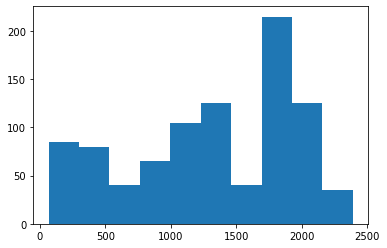

In [65]:
myvar = df.loc[df['mean']==0.6]
plt.hist(myvar['read'])

In [66]:
df.head(10)

,read,tag,mean,final
0,0,0,0.0,0.0
1,1,1,1.0,1.0
2,0,0,0.0,0.0
3,1,1,1.0,1.0
4,0,0,0.0,0.0
5,1,1,1.0,1.0
6,0,0,0.0,0.0
7,1,1,1.0,1.0
8,0,0,0.0,0.0
9,1,1,1.0,1.0


# Get reads with repeated clusters

# Create long reads

In [57]:
nanopore_reads = pd.read_csv('../../data/processed/bioliquid_chr17_pompe_reads.csv')

# Sort and get ID
nanopore_reads = nanopore_reads.sort_values(by='POS',ascending=True) # sort based on starting index of reads
nanopore_reads = nanopore_reads.reset_index()
nanopore_reads['ID'] = nanopore_reads.index
# Get columns of interest
nanopore_reads = nanopore_reads[['ID', 'QNAME', 'FLAG', 'RNAME', 'POS', 'MAPQ', 'CIGAR', 'RNEXT', 'PNEXT','TLEN', 'SEQ', 'QUAL']]
# Drop missing values
nanopore_reads = nanopore_reads.loc[nanopore_reads['SEQ'] != '*'] # drop any rows without a proper nucleotide sequence

In [58]:
nanopore_reads.head()

,ID,QNAME,FLAG,RNAME,POS,MAPQ,CIGAR,RNEXT,PNEXT,TLEN,SEQ,QUAL
0,0,6d90ffed-f2ed-4bf5-8fbe-d3bba26235d1,0,chr17,22936972,11,29S94M1I243M2D34M4D49M3I2M2D78M1D98M1D75M2D49M...,*,0,0,TGCTAGTGTTCTCAACAGTCAGTATTGCTATAGTTCAGCTTTGAAA...,NaN
4,4,7989fa5c-d565-486b-87bb-452f61888d68,16,chr17,22975697,2,21598S15M1I10M1D28M4D10M1D5M2D3M2D5M2D16M2D16M...,*,0,0,TTGACTCGTATTTATCACAAACAAGTTTTGTATGCCTCTCTCGGTT...,NaN
6,6,ebdd1129-003a-4f8d-acb4-72f40f4bbec8,16,chr17,22978432,1,6925S15M1D2M1D9M1D52M2I4M1D10M5D76M1I4M2I70M1D...,*,0,0,AATGTATTGCTGAAACTCTCTCGTGATGATTGCATTCAACTCACAG...,NaN
9,9,ec3a5d57-1638-4b83-8e4c-b87a980df149,0,chr17,22983246,1,30S19M2I26M1I49M3D3M1I24M1D9M1I94M1D51M1D3M1I3...,*,0,0,TGTCGTCTATTCGTTCGTTCGCTGCTGTACAGCGGATACTTGGGCC...,"%$##$'&'#*2,+3.()&)&&'/.)*'+)#%*06873++53.2736..."
10,10,20934f8a-dc46-46c6-bd80-b03dc048d8ee,0,chr17,22984020,1,61S16M2I11M1D2M1D5M1D9M4I4M1I4M1D87M1D12M1I3M2...,*,0,0,TCTGTGTGTGTCTTCGTTTCAGTTGCATCTGCTCAGAAACTTTCCT...,"##'*$'&'&&'#).#*$,.('1*,&'&&&*($)%+/0+-+$.%&%+..."


In [ ]:
# Cluster switching


# Disease diagnostics

GAA Gene: Chr17 80101535..80119881

In [68]:
80119881-80101535

18346

## Find read that covers that region

In [72]:
nanopore_reads['POS'].min()
nanopore_reads['POS'].max()

26999051